# Student Information

- **Name:** Khalid Bin Mahamud Bhuiya
- **ID:** 22-46601-1
- **Section:** C
- **Course Teacher:** Dr. Md. Asraf Ali

# Feature Extraction Techniques From Raw Image
Feature extraction is a crucial phase in image processing and computer vision that involves detecting and representing key structures within an image. This technique converts raw image data into numerical features that can be analyzed, while maintaining the important details. These features play a significant role in various subsequent tasks, including object detection, classification, and image matching.


# Importing the libraries


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing the image


In [45]:
image = cv2.imread("./bird.jpg")  # The image is in BGR format

# Convertion of BGR to RGB


In [46]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizing the RGB image


(-0.5, 639.5, 680.5, -0.5)

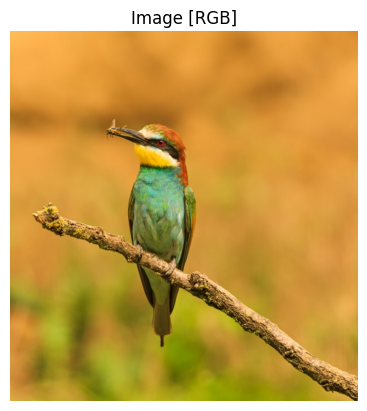

In [47]:
plt.imshow(image_rgb)
plt.title("Image [RGB]")
plt.axis("off")

# Converting the image into gray-scale image


In [48]:
# Converts the image to gray-scale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Visualizing the gray-scaled image


(-0.5, 639.5, 680.5, -0.5)

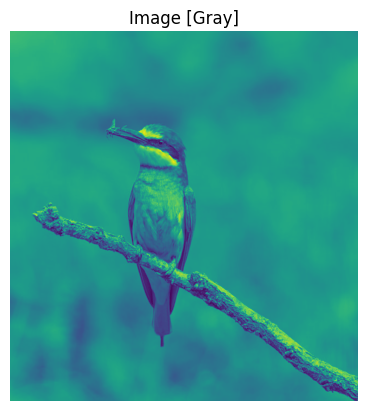

In [49]:
plt.imshow(image_gray)
plt.title("Image [Gray]")
plt.axis("off")

# Color-based Features

Color-based feature extraction techniques leverage the color information within an image to derive meaningful features. These techniques are widely used in image processing, computer vision, and pattern recognition.


## Color Histograms

One of the most commonly used methods for representing the color distribution in an image is through color histograms. A color histogram quantifies the frequency of occurrence of different color values or bins in an image. By dividing the color space into discrete intervals or bins, such as RGB (Red, Green, Blue) or HSV (Hue, Saturation, Value), a histogram captures the distribution of colors across the image.


### Calculation the Histogram for each channel


In [50]:
# Calculates histograms for each channel
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256]).flatten()
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256]).flatten()
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256]).flatten()

### Normalizing the Histograms

Normalization is important because it ensures that the histogram values are independent of the image size and total number of pixels. This allows for consistent comparison between histograms from different images, regardless of their dimensions. Normalized histograms provide a probability distribution of pixel intensities, which is useful in various image processing tasks, such as image comparison, feature extraction, and image recognition.


In [51]:
# Normalizes the histogram value
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

### Visualizing the Histograms


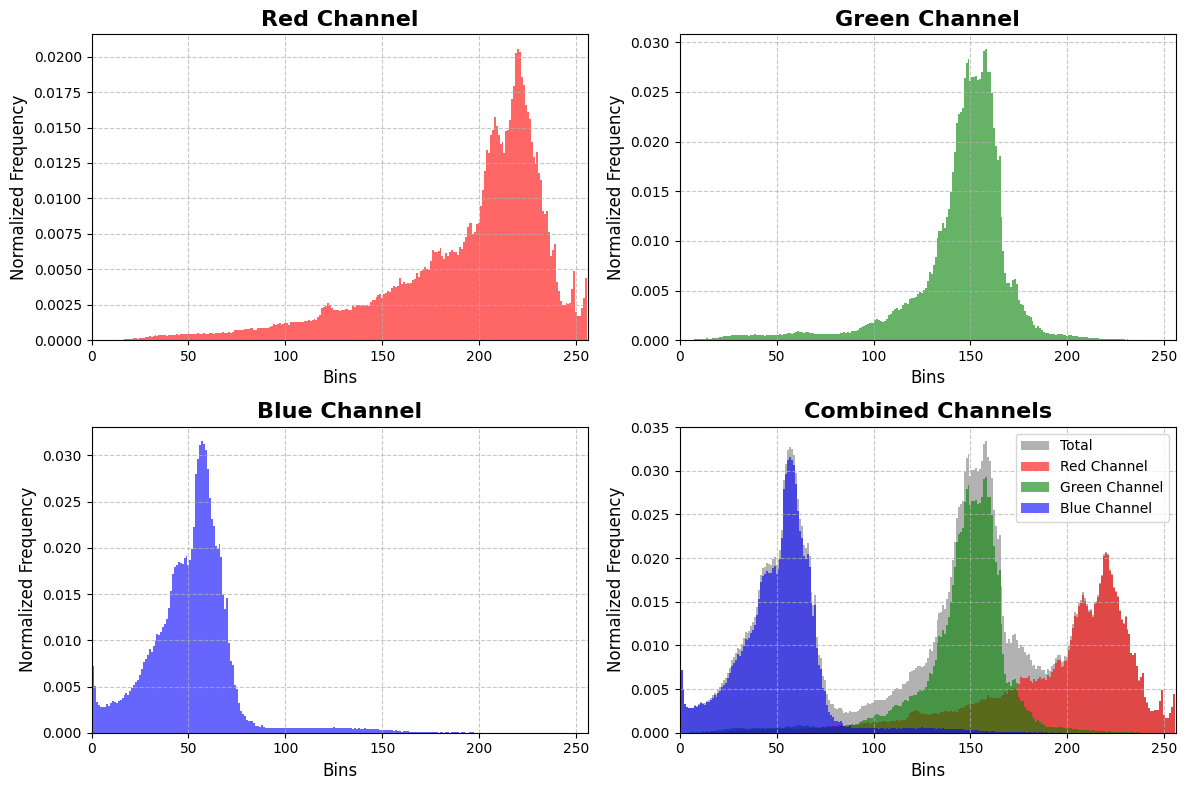

In [52]:
# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8), facecolor="white")
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot individual Red channel in the top-left subplot
axs[0, 0].bar(range(256), hist_r, color="r", width=1.0, alpha=0.6)
axs[0, 0].set_xlim([0, 256])
axs[0, 0].set_title("Red Channel", fontsize=16, fontweight="bold")
axs[0, 0].set_xlabel("Bins", fontsize=12)
axs[0, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 0].grid(True, linestyle="--", alpha=0.7)

# Plot individual Green channel in the top-right subplot
axs[0, 1].bar(range(256), hist_g, color="g", width=1.0, alpha=0.6)
axs[0, 1].set_xlim([0, 256])
axs[0, 1].set_title("Green Channel", fontsize=16, fontweight="bold")
axs[0, 1].set_xlabel("Bins", fontsize=12)
axs[0, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 1].grid(True, linestyle="--", alpha=0.7)

# Plot individual Blue channel in the bottom-left subplot
axs[1, 0].bar(range(256), hist_b, color="b", width=1.0, alpha=0.6)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_title("Blue Channel", fontsize=16, fontweight="bold")
axs[1, 0].set_xlabel("Bins", fontsize=12)
axs[1, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 0].grid(True, linestyle="--", alpha=0.7)

# Plot combined histogram in the bottom-right subplot
hist_total = hist_r + hist_g + hist_b
axs[1, 1].bar(range(256), hist_total, color="gray", width=1.0, alpha=0.6, label="Total")
axs[1, 1].bar(range(256), hist_r, color="r", width=1.0, alpha=0.6, label="Red Channel")
axs[1, 1].bar(
    range(256), hist_g, color="g", width=1.0, alpha=0.6, label="Green Channel"
)
axs[1, 1].bar(range(256), hist_b, color="b", width=1.0, alpha=0.6, label="Blue Channel")
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_title("Combined Channels", fontsize=16, fontweight="bold")
axs[1, 1].set_xlabel("Bins", fontsize=12)
axs[1, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 1].legend(loc="upper right", fontsize=10)
axs[1, 1].grid(True, linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

## Color Moments

Color moments are measures that can be used differentiate images based on their features of color. Once calculated, these moments provide a measurement for color similarity between images. The mean, standard deviation and skewness are commonly used color moments

- **Mean:** Mean can be understood as the average color value in the image.

  $$
  E_i = \frac{1}{N} \sum_{j=1}^{N} p_{ij}
  $$

- **Standard Deviation:** The standard deviation is the square root of the variance of the distribution.

  $$
  \sigma_i = \sqrt{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^2)}
  $$

- **Skewness:** Skewness can be understood as a measure of the degree of asymmetry in the distribution.
  $$
  s_i = \sqrt[3]{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^3)}
  $$


### Calculating the mean, variance and skewness for each channel


In [53]:
from scipy.stats import skew

# Splitting the channels
channels = cv2.split(image_rgb)
mean = []
std_deviation = []
skewness = []

# Calculating the mean, variance and skewness for each channel
for channel in channels:
    mean.append(np.mean(channel))
    std_deviation.append(np.std(channel))
    skewness.append(skew(channel.flatten()))

In [54]:
print("Mean:", mean)
print("Standard Deviation:", std_deviation)
print("Skewness:", skewness)

Mean: [193.35006194933922, 144.73415014684286, 50.65729396108664]
Standard Deviation: [42.22622533828454, 26.414928112645917, 22.913644242978894]
Skewness: [-1.393137198609348, -1.857558189713299, 0.8611079145556424]


# Texture Based Features

Texture analysis is an important part of image processing and computer vision that looks at how pixel intensities are arranged in an image. It helps in understanding the texture of an image, which is important for tasks like classifying, segmenting, and recognizing images, especially when the images have repeating patterns or complex structures.


## Gray-Level Co-occurrence Matrix (GLCM)

The Gray Level Co-occurrence Matrix (GLCM) is a statistical method used to analyze the texture of an image by examining the spatial relationships between pixel intensities. Four important measures derived from the GLCM are Contrast, Correlation, Energy, and Homogeneity.

**Contrast:** Contrast measures the local variations in the GLCM, indicating how much the intensity of a pixel differs from its neighbors over the whole image.

$$
\text{Contrast} = \sum_{i,j} (i - j)^2 \cdot P(i, j)
$$

where $P(i, j)$ is the $(i, j)$-th entry in the normalized GLCM.

**Correlation:** Correlation measures the joint probability occurrence of specified pixel pairs, describing how correlated a pixel is to its neighbor over the entire image.

$$
\text{Correlation} = \frac{\sum_{i,j} (i - \mu_i)(j - \mu_j) \cdot P(i, j)}{\sigma_i \sigma_j}
$$

where $\mu_i$ and $\mu_j$ are the means, and $\sigma_i$ and $\sigma_j$ are the standard deviations of the GLCM.

**Energy:** Energy (also known as Angular Second Moment) measures the sum of squared elements in the GLCM. It represents the textural uniformity or pixel pair repetitions in an image.

$$
\text{Energy} = \sum_{i,j} P(i, j)^2
$$

**Homogeneity:** Homogeneity (also known as Inverse Difference Moment) measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal, indicating how uniform the texture is.

$$
\text{Homogeneity} = \sum_{i,j} \frac{P(i, j)}{1 + |i - j|}
$$


### Calculating the co-occurrence matrix for the image


In [55]:
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(
    image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True
)

### Visualizing GLCM as heatmap


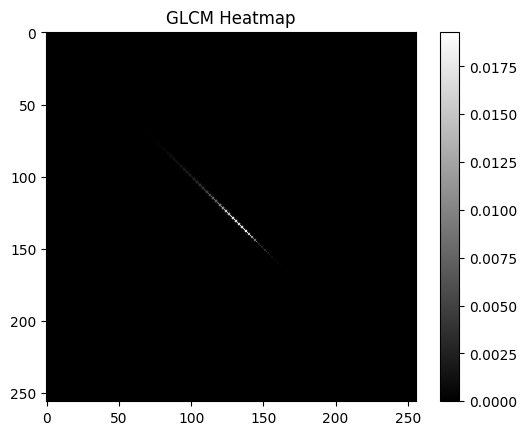

In [74]:
plt.imshow(glcm[:, :, 0, 0], cmap="gray", interpolation="nearest")
plt.title("GLCM Heatmap")
plt.colorbar()
plt.show()

### Calculating the texture features from the co-occurrence matrix


In [57]:
contrast = graycoprops(glcm, "contrast")[0, 0]
homogeneity = graycoprops(glcm, "homogeneity")[0, 0]
energy = graycoprops(glcm, "energy")[0, 0]
correlation = graycoprops(glcm, "correlation")[0, 0]

### Printng the texture features


In [58]:
print("Contrast: {:.3f}".format(contrast))
print("Homogeneity: {:.3f}".format(homogeneity))
print("Energy: {:.3f}".format(energy))
print("Correlation: {:.3f}".format(correlation))

Contrast: 50.850
Homogeneity: 0.699
Energy: 0.086
Correlation: 0.958


## Local Binary Patterns (LBP)

LBP is a straightforward but effective technique for describing texture. It works by comparing the intensity of each pixel in an image with the intensities of its neighboring pixels. A binary code is assigned based on whether each neighbor's intensity is higher or lower than that of the central pixel. This binary coding captures the texture details of the image. LBP is known for its robustness against illumination variations and its computational efficiency, making it ideal for real-time tasks like face recognition, texture analysis, and object detection.
The following steps outline the process of computing LBP features from an image:

1. **Convert Image to Grayscale**

   - Convert the input image to grayscale to simplify processing:
     $$
     I(x, y) = 0.299 \cdot R(x, y) + 0.587 \cdot G(x, y) + 0.114 \cdot B(x, y)
     $$
   - Where $R(x, y)$, $G(x, y)$, and $B(x, y)$ are the red, green, and blue color channels, respectively.

2. **Compute LBP**

   - Compute the LBP of the grayscale image using the `local_binary_pattern` function. The LBP is defined for each pixel in a local neighborhood. For the uniform method, the number of neighbors $P$ and the radius $R$ are specified.
     $$
     \text{LBP}(x, y) = \sum*{i=0}^{P-1} b_i \cdot 2^i
     $$
     where:
     $$
     b_i = \begin{cases}
     1 & \text{if } I*{neighbor,i} \geq I\_{center} \\
     0 & \text{otherwise}
     \end{cases}
     $$
   - $P = 8$: Number of neighboring pixels.
   - $R = 1$: Radius of the circular neighborhood.
   - The `method='uniform'` parameter specifies that uniform patterns are used, which have at most 2 bit transitions.

3. **Compute Histogram**

   - Compute the histogram of the LBP values. This histogram represents the frequency of each LBP code.
     $$
     H = \text{histogram}(\text{LBP}, \text{bins}= \text{np.arange}(0, 11), \text{range}=(0, 10))
     $$
   - Normalize the histogram by dividing by the sum of all histogram values:
     $$
     H\_{normalized} = \frac{H}{\sum H}
     $$
   - This normalization ensures that the histogram is a probability distribution.

4. **Return LBP Features**
   - The normalized histogram of LBP values is used as the feature vector representing the texture of the image.


### Calculating the LBP


In [59]:
from skimage.feature import local_binary_pattern

lbp = local_binary_pattern(image_gray, P=8, R=1, method="uniform")

### Visualizing the LBP transformation of the image


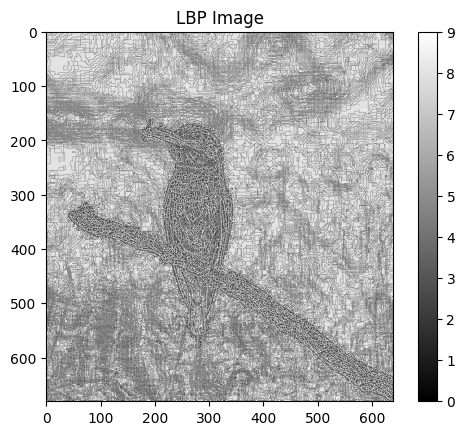

In [75]:
plt.imshow(lbp, cmap="gray")
plt.title("LBP Image")
plt.colorbar()
plt.show()

### Calculating the Histogram of LBP features


In [61]:
hist_lbp, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
hist_lbp = hist_lbp.astype("float")
hist_lbp /= hist_lbp.sum()

### Printing the calculated LBP features


In [62]:
print("LBP Features:\n", hist_lbp)

LBP Features:
 [0.01091456 0.02576175 0.01074706 0.11085261 0.07393768 0.2426808
 0.05047724 0.09045062 0.34171944 0.04245824]


### Visualizing the LBP Histogram


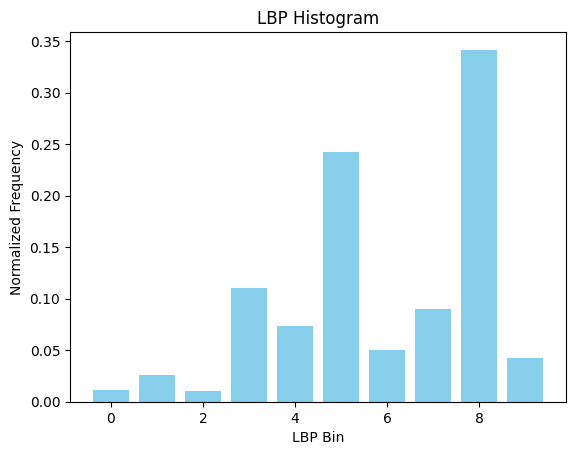

In [76]:
plt.bar(range(len(hist_lbp)), hist_lbp, color="skyblue", width=0.8)
plt.title("LBP Histogram")
plt.xlabel("LBP Bin")
plt.ylabel("Normalized Frequency")
plt.show()

# Edge Detection

Edge detection is a foundational technique used to identify boundaries within an image. It is essential for tasks such as object detection, image segmentation, and feature extraction. Edge detection algorithms focus on locating points where there is a significant change in image intensity, indicating the presence of an edge or boundary between different objects or regions.


## Canny Edge Detection

Canny edge detection involves smoothing, gradient calculation, non-maximum suppression, double thresholding, and edge tracking by hysteresis to detect edges in an image while minimizing noise and false edges.

1. **Gaussian Smoothing**

   - Smooth the image to reduce noise using a Gaussian filter:
     $$
     G(x, y) = \frac{1}{2 \pi \sigma^2} e^{-\frac{x^2 + y^2}{2 \sigma^2}}
     $$
   - Where $\sigma$ is the standard deviation, and $ x$ and $ y$ are pixel coordinates.

2. **Gradient Calculation**

   - Compute the gradients $ G_x$ and $ G_y$ using Sobel operators:
     $$
     G_x = \frac{\partial I}{\partial x}
     $$
     $$
     G_y = \frac{\partial I}{\partial y}
     $$
   - Calculate the gradient magnitude $ G$ and direction $\theta$:
     $$
     G = \sqrt{G_x^2 + G_y^2}
     $$
     $$
     \theta = \arctan\left(\frac{G_y}{G_x}\right)
     $$

3. **Non-Maximum Suppression**

   - Thin the edges by suppressing all non-maximum points in the gradient direction:
     - Compare each pixel's gradient magnitude to its neighbors along the gradient direction. Keep the pixel if it is the maximum.

4. **Double Thresholding**

   - Apply high ($T_H$) and low ($T_L$) thresholds:
     - Strong edges: $G > T_H$
     - Weak edges: $T_L < G \leq T_H$
     - Suppress: $G \leq T_L$

5. **Edge Tracking by Hysteresis**
   - Connect weak edges to strong edges if they are connected:
     - Strong edges are retained.
     - Weak edges connected to strong edges are also retained, otherwise suppressed.


### Detecting the edges


In [64]:
# The lower threshold is 100 and the upper threshold is 200 for the hysteresis procedure
edges = cv2.Canny(image_gray, 100, 200)

### Visualizing the edges


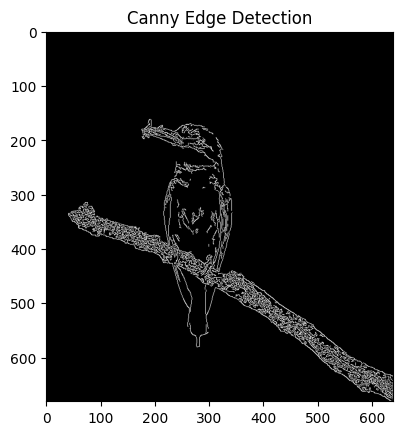

In [77]:
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.show()

# Corner Detection

## Harris Corner Detection Algorithm

The Harris Corner Detection algorithm is used to identify corner points in an image. Corners are defined as points where the image gradients change significantly in multiple directions. The Harris Corner Detection algorithm identifies corners by calculating the gradient products, applying Gaussian smoothing, computing a corner response function, and then performing thresholding and dilation to highlight the corners on the original image. The following steps outline the algorithm:

1. **Convert Image to Grayscale**

   - Convert the input image to a grayscale image:
     $$
     I(x, y) = 0.299 \cdot R(x, y) + 0.587 \cdot G(x, y) + 0.114 \cdot B(x, y)
     $$
   - Where $R(x, y)$, $G(x, y)$, and $B(x, y)$ are the red, green, and blue color channels, respectively.

2. **Compute Image Gradients**

   - Calculate the gradients of the grayscale image in the x and y directions using filters (e.g., Sobel operators):
     $$
     I_x = \frac{\partial I}{\partial x}
     $$
     $$
     I_y = \frac{\partial I}{\partial y}
     $$

3. **Compute Gradient Products**

   - Compute the products of the gradients:
     $$
     I_x^2 = I_x \cdot I_x
     $$
     $$
     I_y^2 = I_y \cdot I_y
     $$
     $$
     I_x I_y = I_x \cdot I_y
     $$

4. **Apply Gaussian Filter**

   - Smooth the gradient products with a Gaussian filter to obtain the components of the structure tensor:
     $$
     M_{11} = \sum_{x, y} I_x^2 \cdot G(x, y)
     $$
     $$
     M_{22} = \sum_{x, y} I_y^2 \cdot G(x, y)
     $$
     $$
     M_{12} = \sum_{x, y} I_x I_y \cdot G(x, y)
     $$
   - Where $G(x, y)$ is a Gaussian kernel with standard deviation $\sigma$.

5. **Compute Corner Response**

   - Calculate the Harris corner response $R$:
     $$
     R = \text{det}(M) - k \cdot (\text{trace}(M))^2
     $$
     - **Determinant**:
       $$
       \text{det}(M) = M_{11} \cdot M_{22} - (M_{12})^2
       $$
     - **Trace**:
       $$
       \text{trace}(M) = M_{11} + M_{22}
       $$
     - **Constant** $k$ is typically set to 0.04 - 0.06.

6. **Thresholding and Non-Maximum Suppression**

   - Apply a threshold to the corner response to identify corners:
     $$
     \text{Corners} = R > \text{threshold} \times R_{\text{max}}
     $$
   - Where $R_{\text{max}}$ is the maximum value of $R$.

7. **Dilate Corners**

   - Dilate the detected corners to enhance visibility:
     $$
     \text{Dilated} = \text{dilate}(R, \text{None})
     $$

8. **Overlay Corners on Original Image**
   - Mark the corners on the original image:
     ```python
       image[corners > 0.01 * corners.max()] = [0, 0, 255]
     ```
   - Corners are marked in red ([0, 0, 255] in BGR color format).


### Detecting the corners using Harris Corner Detection Algorithm


In [66]:
def harris_corner_detection(image_gray):
    image_gray = np.float32(image_gray)
    corners = cv2.cornerHarris(image_gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    image[corners > 0.01 * corners.max()] = [0, 0, 255]
    return image


corner_image = harris_corner_detection(image_gray)

### Visualizing the corners


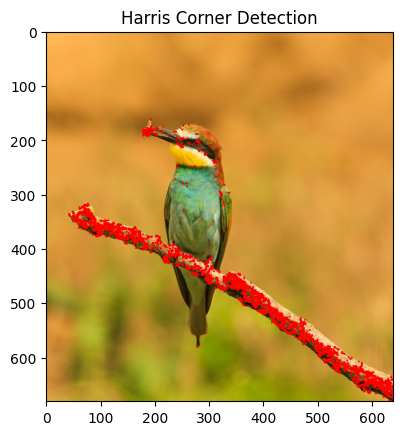

In [78]:
plt.title("Harris Corner Detection")
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.show()

# Blob Detection

Blob detection algorithm identifies regions of interest in an image where significant changes in intensity occur. By converting the image to grayscale, applying the `SimpleBlobDetector`, and using the Difference of Gaussians method, blobs are detected and highlighted on the original image. The detected blobs are then drawn on the image, typically represented as circles or other shapes to indicate their location and size.

Here’s a step-by-step overview of the blob detection process:

1. **Convert Image to Grayscale**

   - Convert the input image to grayscale to simplify processing:
     $$
     I(x, y) = 0.299 \cdot R(x, y) + 0.587 \cdot G(x, y) + 0.114 \cdot B(x, y)
     $$
   - Where $R(x, y)$, $G(x, y)$, and $B(x, y)$ are the red, green, and blue color channels, respectively.

2. **Create Blob Detector**

   - Use OpenCV’s `SimpleBlobDetector` to detect blobs. The DoG method is applied internally in this detector:
     ```python
     detector = cv2.SimpleBlobDetector_create()
     ```

3. **Detect Blobs**

   - Apply the detector to the grayscale image to find keypoints that represent blobs:
     ```python
     keypoints = detector.detect(image_gray)
     ```
   - Each keypoint corresponds to a detected blob in the image.

4. **Draw Keypoints**
   - Draw the detected blobs on the original image:
     ```python
     blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                   cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
     ```
   - In this step:
     - `image`: The original image on which blobs will be highlighted.
     - `keypoints`: The detected blobs.
     - `np.array([])`: An empty array to specify the color of the keypoints.
     - `(0, 0, 255)`: Color for the blobs (red in BGR format).
     - `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`: Flag to draw blobs with additional information (e.g., size).

## Difference of Gaussians (DoG) Method

The DoG method is used to detect blobs by subtracting two Gaussian-blurred versions of the image. The key steps involved are:

1. **Apply Gaussian Filters**

   - Smooth the image with two different Gaussian filters of different standard deviations $\sigma_1$ and $\sigma_2$:
     $$
     G_1(x, y) = \frac{1}{2 \pi \sigma_1^2} e^{-\frac{x^2 + y^2}{2 \sigma_1^2}}
     $$
     $$
     G_2(x, y) = \frac{1}{2 \pi \sigma_2^2} e^{-\frac{x^2 + y^2}{2 \sigma_2^2}}
     $$

2. **Compute Difference**

   - Subtract the blurred images:
     $$
     \text{DoG}(x, y) = (I * G_1)(x, y) - (I * G_2)(x, y)
     $$
   - This highlights regions of the image where there are significant changes in intensity, which correspond to blobs.

3. **Detect Local Extrema**
   - Identify local extrema in the DoG image to find blobs. These extrema represent regions where the intensity difference between the two Gaussian-blurred images is maximized.


### Detect the blobs using DoG method


In [72]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image_gray)
blob_image = cv2.drawKeypoints(
    image,
    keypoints,
    np.array([]),
    (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

### Visualizing the blobs


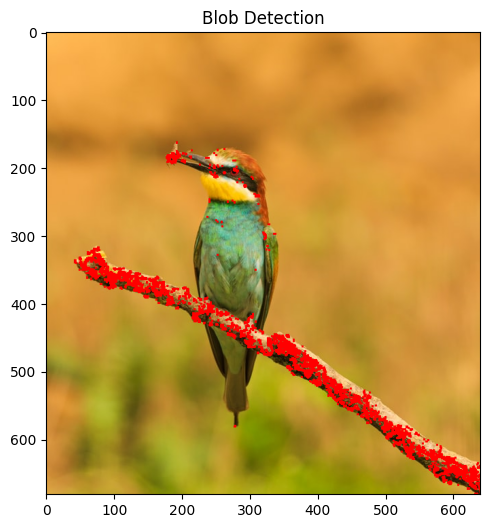

In [73]:
plt.figure(figsize=(10, 6))
plt.title("Blob Detection")
plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))
plt.show()

# More Feature Extraction Techniques

In addition to the above methods, several other techniques are widely used for feature extraction from images. Here are some notable ones:

1. **Convolutional Neural Networks (CNNs)**
   - **Description**: CNNs are specifically designed for processing color images and extracting complex features. They excel in tasks such as image classification, object detection, and segmentation.
   - **Advantages**: Handles variations in lighting, scale, and other factors effectively. Provides high accuracy and is suitable for large datasets with complex features.
   - **Use Cases**: High-accuracy image processing tasks where detailed and robust feature extraction is needed.

2. **Autoencoders**
   - **Description**: Autoencoders are used for unsupervised learning tasks like dimensionality reduction, anomaly detection, image denoising, and data compression.
   - **Advantages**: Useful when CNNs are computationally expensive or when labeled data is limited. Helps in removing noise and learning compact representations.
   - **Use Cases**: High-dimensional, noisy data; can be combined with CNNs in transfer learning to improve performance.

3. **Histogram of Oriented Gradients (HOG)**
   - **Description**: HOG extracts gradient information by computing histograms of oriented gradients in localized regions.
   - **Advantages**: Effective in scenarios with small datasets or low-resolution images. Can be combined with standard machine learning algorithms like Support Vector Machines (SVM).
   - **Use Cases**: Object detection, face detection, pedestrian detection, text classification, and OCR where data is limited or images are pixelated.

4. **Scale-Invariant Feature Transform (SIFT)**
   - **Description**: SIFT detects keypoints and extracts local feature descriptors that are invariant to scale, orientation, and affine transformations.
   - **Advantages**: Robust to various image transformations and variations.
   - **Use Cases**: Object recognition, image stitching, 3D reconstruction, particularly with limited datasets.

5. **Frequency-Based Features**
   - **Description**: Methods like Fourier descriptors capture the frequency content of an image.
   - **Advantages**: Useful for capturing rotational and spatial invariance.
   - **Use Cases**: Object recognition, texture analysis, data compression, and image retrieval where data is limited.

These techniques offer diverse approaches for feature extraction, each with its unique advantages and best-use scenarios. The choice of method depends on the specific problem, available data, and computational resources.
